### This Jupyter notebook is used to run the ensemble neural network machine
### learning model to predict embrittlement of reactor pressure vessel (RPV)
### steel alloys. If you find the model useful, please cite the original reference:

### Jacobs, R., Yamamoto, T., Odette, G. R., Morgan, D. "Predictions and
### Uncertainty Estimates of Reactor Pressure Vessel Steel Embrittlement Using
### Machine Learning", Materials and Design, 236 (2023) (https://doi.org/10.1016/j.matdes.2023.112491).

### Note that this model was developed for academic research purposes and should not be used for activities where certified accuracy is required (e.g., regulatory activities) without further discussion.
### Current work is ongoing to identify potential issues and update the model accordingly. Therefore, the model may evolve in the future and have newer versions that give somewhat different answers. Any questions/feedback should be sent to:
### Ryan Jacobs (rjacobs3@wisc.edu) or Dane Morgan (ddmorgan@wisc.edu)

First, we clone the RPV model Github repository to this Colab session:

In [1]:
import warnings
warnings.filterwarnings("ignore")
!git clone https://github.com/uw-cmg/RPV_model_Jacobs23.git

Cloning into 'RPV_model_Jacobs23'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 23 (delta 0), reused 20 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 108.25 MiB | 21.89 MiB/s, done.


Next, we install required software packages:

In [6]:
!pip install -r RPV_model_Jacobs23/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of pymatgen to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pymatgen to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

Restart the runtime (Runtime -> Restart Session) for the new package installs to take effect (you may get prompted with a pop-up to do this)

Add the path of the RPV_model_Jacobs23 repo so python can find it

In [7]:
import sys
sys.path.append('RPV_model_Jacobs23')

This repo is meant to run the Jacobs '23 neural network model. For other models, see our development repo at https://github.com/uw-cmg/RPV_model

fullfit: The full fit model to the entire database of UCSB+PLOTTER data. This is the current production model

In [8]:
model_folder = 'fullfit'

Import the prediction function and your test data (an example is given in test_data.csv) and make predictions! Note the input features of your test data need to be in the same order as shown in this test file

In [9]:
from model_predict_df import make_predictions_DNN
import pandas as pd

df = pd.read_csv('RPV_model_Jacobs23/test_data.csv')
preds = make_predictions_DNN(df, model_folder)

scikit-lego is an optional dependency, enabling use of the LowessRegression model. If you want to use this model, do "pip install scikit-lego"
linear-tree is an optional dependency, enabling use of Linear tree, forest, and boosting models. If you want to use this model, do "pip install linear-tree"
gplearn is an optional dependency, enabling the use of genetic programming SymbolicRegressor model. If you want to use this model, do "pip install gplearn"
Could not find designated model type in scikit-learn model library. Note the other supported modeltype is the keras.wrappers.scikit_learn.KerasRegressor model
1/1 [==============================] - 0s 92ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 18ms/step


Display your predictions. The values in the "preds" column are predicted TTS values, in degrees Celsius. The "ebars" column is the calibrated, one sigma error bar from the ensemble model.

In [10]:
preds

,preds,ebars
0,14.001073,8.925599
1,14.001073,8.925599
2,27.393063,13.632395
3,27.393063,13.632395
4,12.671827,11.352390
5,21.425608,12.390108
6,18.096539,12.848585
7,18.096539,12.848585
8,28.334789,11.072144
9,33.445641,11.628885


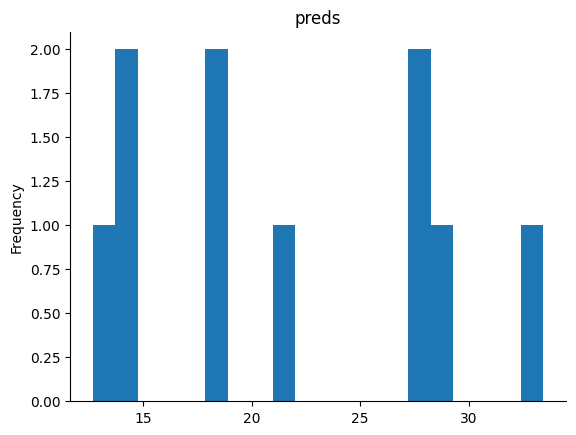

In [11]:
# @title preds

from matplotlib import pyplot as plt
preds['preds'].plot(kind='hist', bins=20, title='preds')
plt.gca().spines[['top', 'right',]].set_visible(False)

Another approach is to simply edit a dictionary of the feature values below and make predictions. Note that each feature list needs to be the same length.

In [12]:
d = {'temperature_C': [287, 291.1, 292.2],
     'wt_percent_Cu': [0.04, 0.15, 0.15],
     'wt_percent_Ni': [0.74, 0.52, 0.52],
     'wt_percent_Mn': [0.6, 1.32, 1.32],
     'wt_percent_P': [0.012, 0.01, 0.01],
     'wt_percent_Si': [0.23, 0.2, 0.2],
     'wt_percent_C': [0.21, 0.21, 0.21],
     'log(fluence_n_cm2)': [18.664547962246548, 17.861534410859036, 19.012837224705173],
     'log(flux_n_cm2_sec)': [11.165741355311178, 10.389599950323971, 10.966255912381982]}

df_fromd = pd.DataFrame(d)
preds_new = make_predictions_DNN(df_fromd, model_folder)

preds_new

Could not find designated model type in scikit-learn model library. Note the other supported modeltype is the keras.wrappers.scikit_learn.KerasRegressor model
1/1 [==============================] - 0s 43ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


,preds,ebars
0,14.001073,8.925599
1,18.109430,12.839308
2,28.369940,11.057064


Here, we can take a designated temperature, composition, and set of flux values and make an embrittlement curve (TTS vs. fluence)

Predicting TTS embrittlement curve for flux = 30000000000
Could not find designated model type in scikit-learn model library. Note the other supported modeltype is the keras.wrappers.scikit_learn.KerasRegressor model
1/1 [==============================] - 0s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step
Predicting TTS embrittlement curve for flux = 3680000000000.0
Could not find designated model type in scikit-learn model library. Note the other supported modeltype is the keras.wrappers.scikit_learn.KerasRegressor model
1/1 [==============================] - 0s 79ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Predicting TTS embrittlement curve for flux = 100000000000000
Could not find designated model type in scikit-learn model library. Note the other supported modeltype is the keras.wrappers.scikit_learn.KerasRegressor model
1/1 [==============================] - 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step


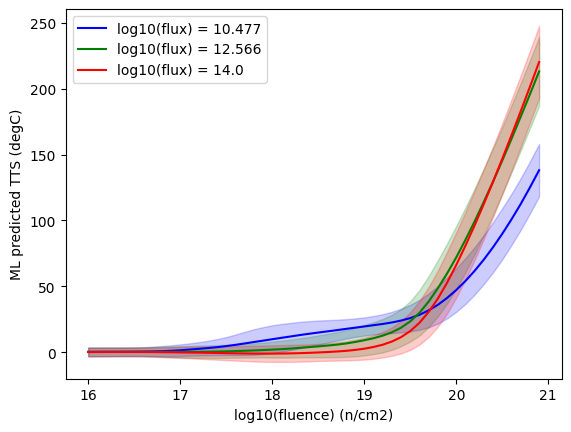

In [15]:
import numpy as np
from matplotlib import pyplot as plt

# Edit the desired temperature, composition and fluxes below
# Note the number of points to grid fluence can also be provided.
# Plotting a given flux value with 50 points will take about 45-60 seconds

########################################
########################################

d = {'temperature_C': 287,
     'wt_percent_Cu': 0.04,
     'wt_percent_Ni': 0.74,
     'wt_percent_Mn': 0.6,
     'wt_percent_P': 0.012,
     'wt_percent_Si': 0.23,
     'wt_percent_C': 0.21}

fluxes = [3*10**10, 3.68*10**12, 1*10**14]
num_points = 50

########################################
########################################

all_preds = list()
all_errs = list()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'grey']
for flux in fluxes:
    print('Predicting TTS embrittlement curve for flux =', flux)
    log_fluence = np.arange(16, 21, 5/num_points)
    temp = [d['temperature_C'] for i in log_fluence]
    Cu = [d['wt_percent_Cu'] for i in log_fluence]
    Ni = [d['wt_percent_Ni'] for i in log_fluence]
    Mn = [d['wt_percent_Mn'] for i in log_fluence]
    P = [d['wt_percent_P'] for i in log_fluence]
    Si = [d['wt_percent_Si'] for i in log_fluence]
    C = [d['wt_percent_C'] for i in log_fluence]
    f = [np.log10(flux) for i in log_fluence]

    df_test = pd.DataFrame({'temperature_C': temp,
                            'wt_percent_Cu': Cu,
                            'wt_percent_Ni': Ni,
                            'wt_percent_Mn': Mn,
                            'wt_percent_P': P,
                            'wt_percent_Si': Si,
                            'wt_percent_C': C,
                            'log(fluence_n_cm2)': log_fluence,
                            'log(flux_n_cm2_sec)': f})

    preds_test = make_predictions_DNN(df_test, model_folder)
    all_preds.append(preds_test['preds'])
    all_errs.append(preds_test['ebars'])

plt.clf()
data = dict()
for i, flux in enumerate(fluxes):
    flux_val = str(round(np.log10(flux),3))
    data['Preds for Flux = '+flux_val] = all_preds[i]
    data['Ebars for Flux = '+flux_val] = all_errs[i]
    plt.plot(log_fluence, all_preds[i], label='log10(flux) = '+flux_val, color=colors[i])
    plt.fill_between(log_fluence, all_preds[i]+all_errs[i], all_preds[i]-all_errs[i], color=colors[i], alpha=0.2)

data['log_fluence'] = log_fluence
pd.DataFrame(data).to_csv('embrittlement_curve_data.csv', index=False)
plt.xlabel('log10(fluence) (n/cm2)')
plt.ylabel('ML predicted TTS (degC)')
plt.legend(loc='best')
plt.savefig('embrittlement_curve.png', dpi=300, bbox_inches='tight')
plt.show()


Bonus: the AI-based code generation in Google Colab is getting quite good. Try entering the following text into the generate command below:

"Create an interactive line plot using the embrittlement_curve_data.csv where x-axis is the 'log_fluence' data from the .csv file and the y-axis is the 'Preds for Flux = 10.477' data from the .csv file"

In [16]:
# prompt: Create an interactive line plot using the embrittlement_curve_data.csv where x-axis is the 'log_fluence' data from the .csv file and the y-axis is the 'Preds for Flux = 10.477' data from the .csv file

import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file
df = pd.read_csv('embrittlement_curve_data.csv')

# Create the interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['log_fluence'],
    y=df['Preds for Flux = 10.477'],
    mode='lines+markers',
    name='Flux = 10.477'
))

fig.update_layout(
    title="Embrittlement Curve",
    xaxis_title="log10(fluence) (n/cm2)",
    yaxis_title="ML predicted TTS (degC)"
)

fig.show()

You can build upon the previous plot! In the "generate" command, add the following:

"Now add the Preds for Flux = 12.566 and Preds for Flux = 14.0 from the csv file to the previously made interactive plot as additional lines with different colors"

In [18]:
# prompt: Now add the Preds for Flux = 12.566 and Preds for Flux = 14.0 from the csv file to the previously made interactive plot as additional lines with different colors

import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file
df = pd.read_csv('embrittlement_curve_data.csv')

# Create the interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['log_fluence'],
    y=df['Preds for Flux = 10.477'],
    mode='lines+markers',
    name='Flux = 10.477'
))

fig.add_trace(go.Scatter(
    x=df['log_fluence'],
    y=df['Preds for Flux = 12.566'],
    mode='lines+markers',
    name='Flux = 12.566',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=df['log_fluence'],
    y=df['Preds for Flux = 14.0'],
    mode='lines+markers',
    name='Flux = 14.0',
    line=dict(color='green')
))


fig.update_layout(
    title="Embrittlement Curve",
    xaxis_title="log10(fluence) (n/cm2)",
    yaxis_title="ML predicted TTS (degC)"
)

fig.show()